In [19]:
import numpy as np
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import cv2
from pathlib import Path
from ultralytics import YOLO
import os
os.environ['USE_TORCH'] = '1'
from doctr.models import ocr_predictor
import pandas as pd

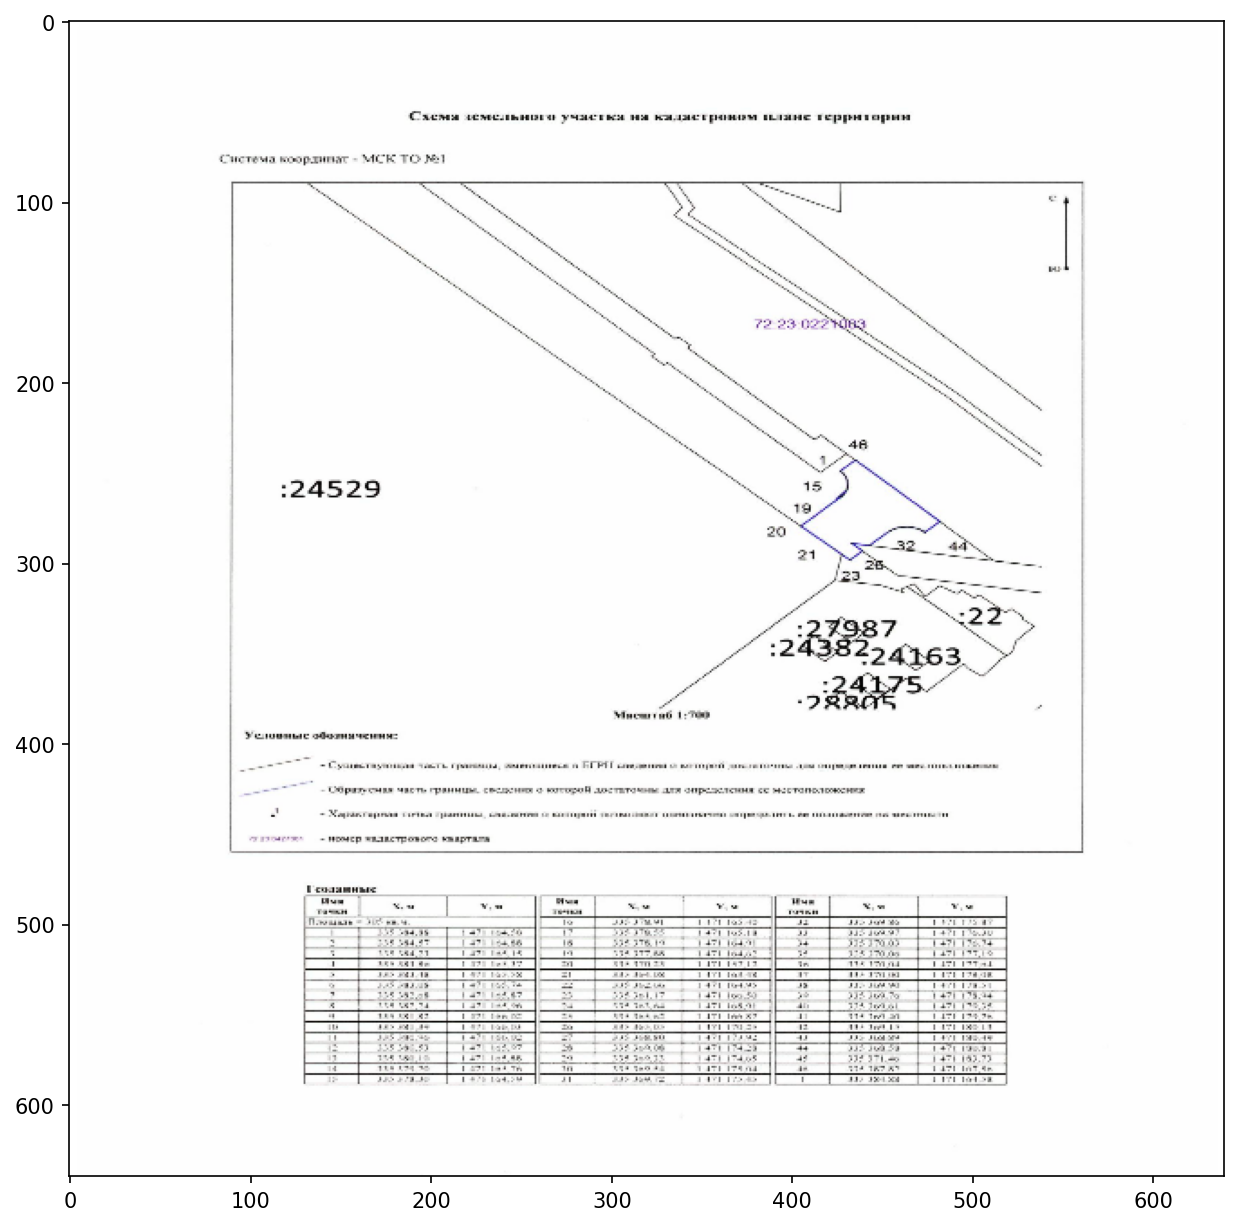

In [1812]:
img = cv2.imread('../dataset/val/202309180001_page_4.jpg')
img = cv2.resize(img, (640,640))
fig = plt.figure(dpi = 150, figsize = (10,10))
plt.imshow(img)

In [1825]:
pred[0].boxes[3]

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.4367], device='cuda:0')
data: tensor([[1.6385e+02, 4.9987e+02, 2.8782e+02, 5.8985e+02, 4.3670e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[225.8338, 544.8627, 123.9657,  89.9762]], device='cuda:0')
xywhn: tensor([[0.3529, 0.8513, 0.1937, 0.1406]], device='cuda:0')
xyxy: tensor([[163.8509, 499.8745, 287.8167, 589.8508]], device='cuda:0')
xyxyn: tensor([[0.2560, 0.7811, 0.4497, 0.9216]], device='cuda:0')

In [1836]:
for b in pred[0].boxes:
    print(b.conf)

tensor([0.9412], device='cuda:0')
tensor([0.8837], device='cuda:0')
tensor([0.8636], device='cuda:0')
tensor([0.4367], device='cuda:0')



0: 736x736 4 tables, 11.9ms
Speed: 3.0ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 736)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.9412, 0.8837, 0.8636, 0.4367], device='cuda:0')
data: tensor([[3.9834e+02, 4.9581e+02, 5.2149e+02, 5.8959e+02, 9.4117e-01, 0.0000e+00],
        [1.3041e+02, 5.0055e+02, 2.5407e+02, 5.9040e+02, 8.8371e-01, 0.0000e+00],
        [2.6205e+02, 4.9565e+02, 3.9122e+02, 5.9007e+02, 8.6356e-01, 0.0000e+00],
        [1.6385e+02, 4.9987e+02, 2.8781e+02, 5.8985e+02, 4.3670e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([4, 6])
xywh: tensor([[459.9168, 542.7019, 123.1451,  93.7829],
        [192.2420, 545.4749, 123.6633,  89.8412],
        [326.6363, 542.8591, 129.1709,  94.4262],
        [225.8318, 544.8629, 123.9640,  89.9758]], device='cuda:0')
xywhn: tensor([[0.7186, 0.8480, 0.1924, 0.1465],
        [0.3004, 0.8523, 0.1932, 0.1404],
        [0.5104, 0.8482, 0.2018, 0.1475],
        [0.3529, 0.8513, 0.1937, 0.1406]], devic

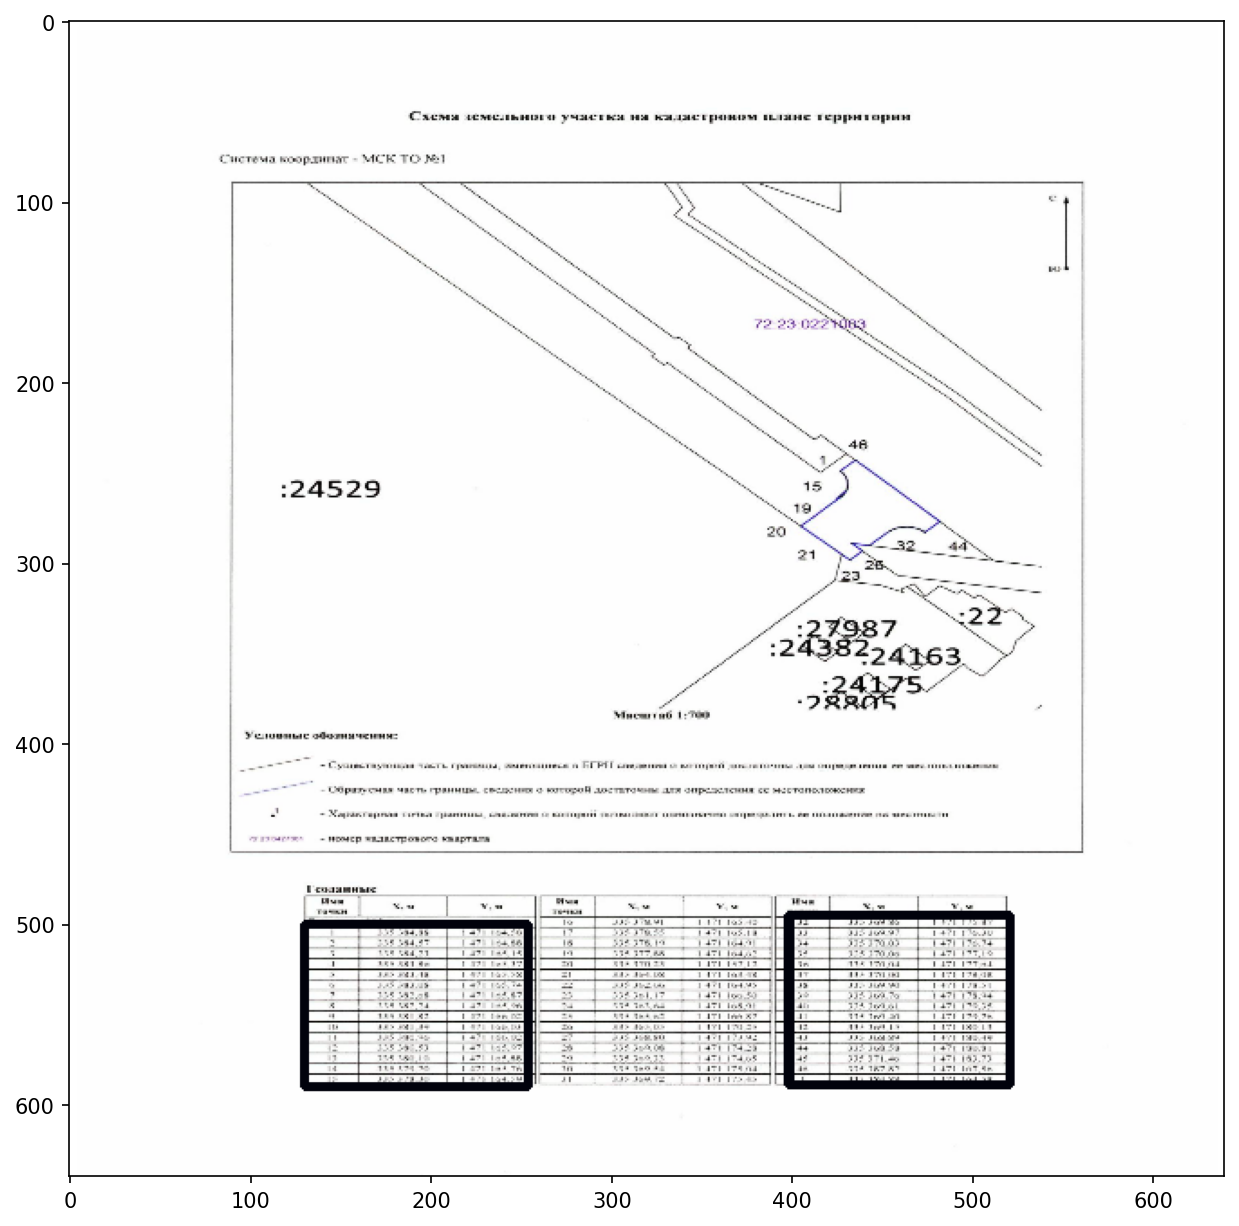

In [1827]:
model = YOLO('./runs/detect/train3/weights/best.pt')

pred = model.predict(img, classes = [0])

print(pred[0].boxes)
x1,y1, x2, y2 = pred[0].boxes[1].xyxy.detach().cpu().numpy()[0]    
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
print(x1, y1, x2, y2)

fig = plt.figure(dpi = 150, figsize = (10,10))
img = cv2.rectangle(img,(int(x1), int(y1)),(int(x2), int(y2)), (1,2,12), thickness = 3)
plt.imshow(img)

In [ ]:
pred = model.predict(img, classes = [0])

In [4]:
for f in Path('../dataset/val/').glob("*.jpg"):
    img = cv2.imread(str(f))
    p = model.predict(img)
    if len(p[0].boxes) == 0:
        continue
    if p[0].boxes[0].conf>0.5:
        x1,y1, x2, y2 = p[0].boxes[0].xyxy.detach().cpu().numpy()[0]    
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        table = img[y1:y2,x1:x2,:]
        print(table.shape,  x1,y1, x2, y2 )
        try:
            cv2.imwrite(f"../dataset/table/{f.name}", table)
        except:
            print("Oшибка")


0: 736x544 1 table, 18.2ms
Speed: 3.1ms preprocess, 18.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)

0: 736x544 1 table, 11.6ms
Speed: 3.1ms preprocess, 11.6ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)

0: 736x544 (no detections), 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 736, 544)


(737, 1305, 3) 227 1246 1532 1983
(998, 702, 3) 136 447 838 1445



0: 736x544 (no detections), 11.8ms
Speed: 3.4ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 736, 544)

0: 736x544 1 table, 11.9ms
Speed: 3.4ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 544)

0: 736x544 1 table, 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)


(2399, 2063, 3) 146 68 2209 2467
(511, 472, 3) 143 1009 615 1520



0: 544x736 1 table, 18.6ms
Speed: 3.3ms preprocess, 18.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 736)

0: 736x544 4 tables, 12.1ms
Speed: 3.3ms preprocess, 12.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)



(625, 2917, 3) 249 386 3166 1011
(1012, 2046, 3) 236 207 2282 1219


0: 736x544 1 table, 11.9ms
Speed: 3.0ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 544)

0: 736x544 1 table, 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)

0: 736x544 2 tables, 11.7ms
Speed: 3.0ms preprocess, 11.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)


(288, 461, 3) 1032 1847 1493 2135
(381, 304, 3) 247 306 551 687
(342, 360, 3) 150 529 510 871



0: 736x544 1 table, 11.9ms
Speed: 3.3ms preprocess, 11.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)

0: 736x544 3 tables, 11.7ms
Speed: 3.0ms preprocess, 11.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)



(1929, 2138, 3) 138 607 2276 2536
(170, 756, 3) 819 951 1575 1121


0: 736x544 1 table, 11.5ms
Speed: 3.0ms preprocess, 11.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)

0: 736x544 (no detections), 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 0.6ms postprocess per image at shape (1, 3, 736, 544)

0: 736x544 3 tables, 11.7ms
Speed: 3.0ms preprocess, 11.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)


(605, 1424, 3) 112 261 1536 866
(345, 320, 3) 1020 1810 1340 2155



0: 544x736 (no detections), 13.0ms
Speed: 3.3ms preprocess, 13.0ms inference, 0.6ms postprocess per image at shape (1, 3, 544, 736)

0: 544x736 2 tables, 12.5ms
Speed: 3.1ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 736)

0: 544x736 1 table, 12.4ms
Speed: 2.9ms preprocess, 12.4ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 736)

0: 736x576 (no detections), 18.5ms
Speed: 3.2ms preprocess, 18.5ms inference, 0.6ms postprocess per image at shape (1, 3, 736, 576)



(227, 432, 3) 569 373 1001 600
(508, 555, 3) 1630 510 2185 1018


0: 736x544 1 table, 12.4ms
Speed: 3.0ms preprocess, 12.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)

0: 544x736 1 table, 13.0ms
Speed: 3.1ms preprocess, 13.0ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 736)


(2040, 1371, 3) 164 77 1535 2117
(628, 406, 3) 83 205 489 833



0: 736x544 2 tables, 12.2ms
Speed: 3.3ms preprocess, 12.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)

0: 736x544 1 table, 11.7ms
Speed: 3.0ms preprocess, 11.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)

0: 736x544 1 table, 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)


(1022, 315, 3) 1873 604 2188 1626
(572, 1380, 3) 197 876 1577 1448
(573, 1325, 3) 215 1281 1540 1854



0: 736x544 1 table, 11.7ms
Speed: 3.0ms preprocess, 11.7ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 544)


(1003, 405, 3) 74 247 479 1250


In [5]:
!pwd

/storage/reshetnikov/sber_table/notebook


In [ ]:
from pdf2image import convert_from_path, convert_from_bytes
images = convert_from_path(open('/storage/reshetnikov/sber_table/dataset/tabl/230915035/202309150001.pdf', 'rb').read())
for i in range(len(images)):
    images[i].save(f'./temp/{pdf_file.stem}_page_{i}.jpg', 'JPEG')

## OCR

In [1839]:
model = YOLO('./runs/detect/train3/weights/best.pt')

In [2360]:
# img = cv2.imread('../dataset/val/Схема расположения ПС_page_0.jpg')
img = cv2.imread('../dataset/train/202310180001_page_0.jpg')

# img = cv2.imread('../dataset/val/202310040001_page_1.jpg')

pred = model.predict(img, classes = [0]);
print(pred[0].boxes)


0: 736x544 1 table, 17.9ms
Speed: 13.5ms preprocess, 17.9ms inference, 2.2ms postprocess per image at shape (1, 3, 736, 544)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9704], device='cuda:0')
data: tensor([[1.4722e+02, 9.2624e+02, 1.5578e+03, 1.9096e+03, 9.7038e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (2339, 1653)
shape: torch.Size([1, 6])
xywh: tensor([[ 852.5366, 1417.9358, 1410.6260,  983.3969]], device='cuda:0')
xywhn: tensor([[0.5158, 0.6062, 0.8534, 0.4204]], device='cuda:0')
xyxy: tensor([[ 147.2236,  926.2374, 1557.8496, 1909.6343]], device='cuda:0')
xyxyn: tensor([[0.0891, 0.3960, 0.9424, 0.8164]], device='cuda:0')


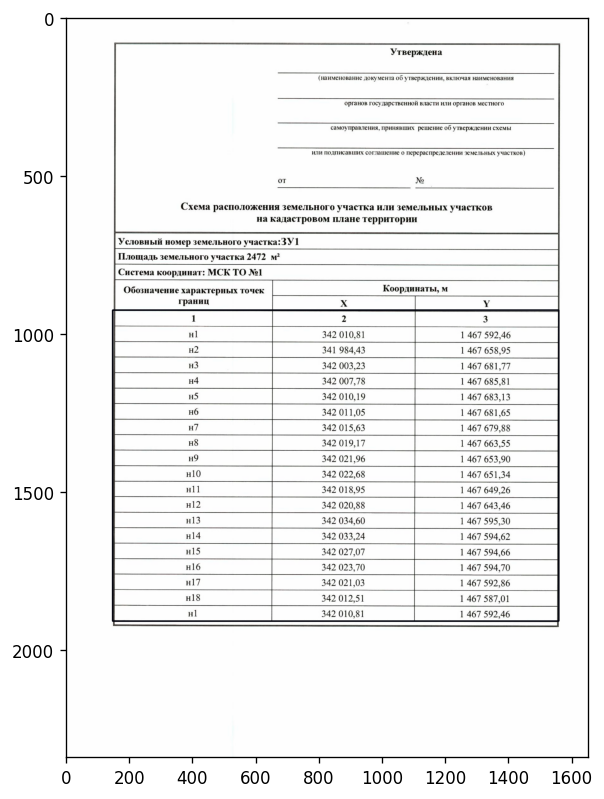

In [2361]:
x1,y1, x2, y2 = pred[0].boxes[0].xyxy.detach().cpu().numpy()[0]    
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
fig = plt.figure(dpi = 120, figsize = (8,8))
img = cv2.rectangle(img,(int(x1), int(y1)),(int(x2), int(y2)), (1,2,12), thickness = 3)
plt.imshow(img)

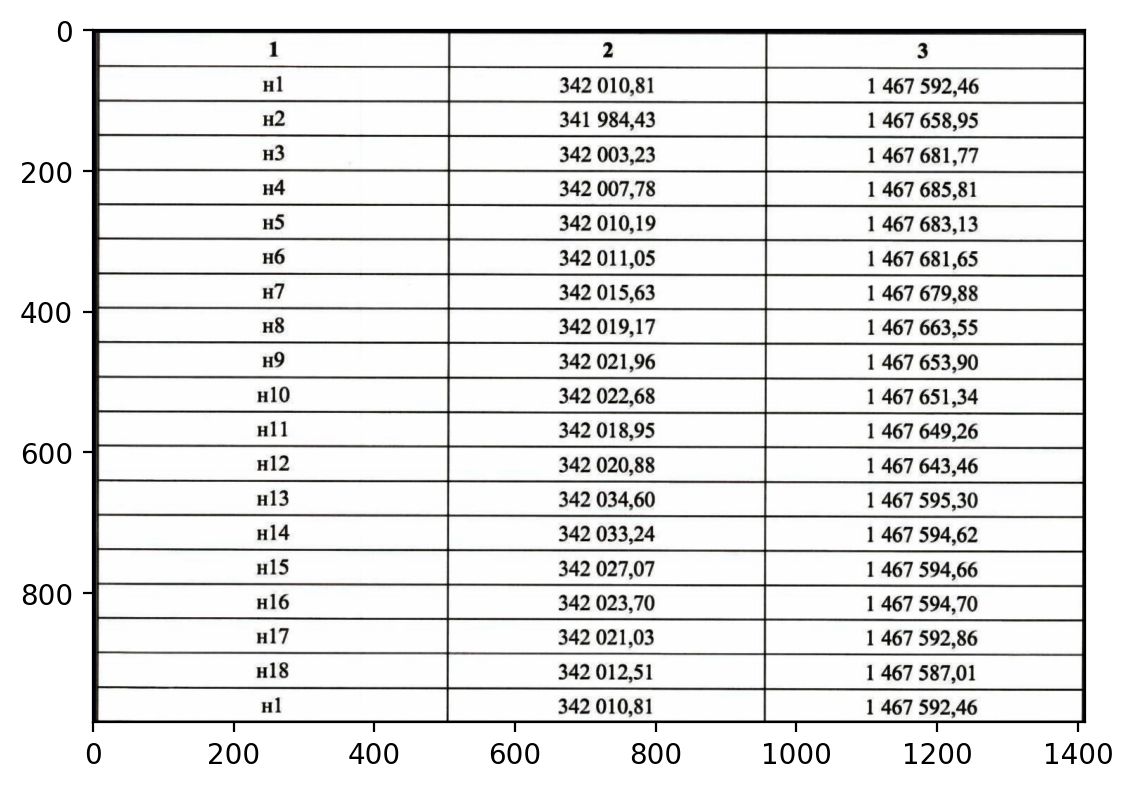

In [2362]:
x1,y1, x2, y2 = pred[0].boxes[0].xyxy.detach().cpu().numpy()[0]    
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
img_crop = img[y1:y2, x1:x2]
img_crop = cv2.erode(img_crop,kernel = np.ones((2,2), np.uint8))
fig = plt.figure(dpi = 200)
plt.imshow(img_crop)

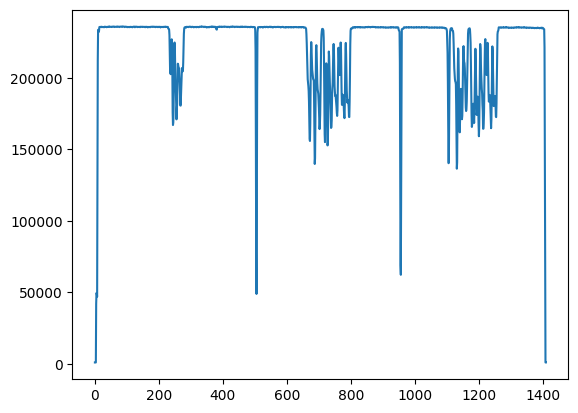

In [2363]:
plt.plot(img_crop[:,:,0].sum(axis=0))

In [2364]:
ocr = ocr_predictor(pretrained=True, detect_language=True, detect_orientation = False)

In [2365]:
result = ocr([img_crop])
pages = result.export()['pages']
blocks = pages[0]['blocks']
print(len(blocks))
#blocks

4


In [2366]:
coords = []
for b in blocks:
    for l in b['lines']:
        for w in l['words']:
            p1 = np.array(w['geometry'][0])
            p2 = np.array(w['geometry'][1])
            centr = (p2 + p1)/2
            coords.append({'value':w['value'],'x_c':centr[0],'y_c':centr[1]})

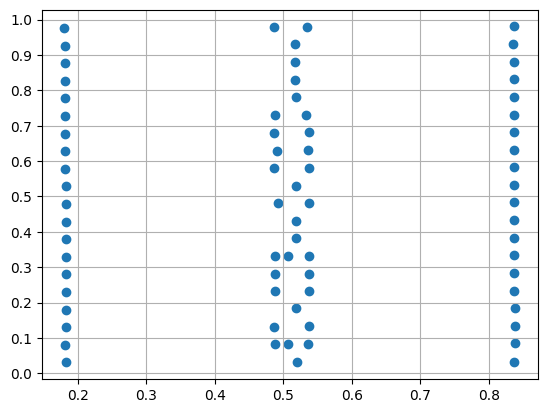

In [2367]:
x = [x['x_c'] for x in coords]
y = [x['y_c'] for x in coords]
plt.scatter(x,y)
plt.grid()
plt.yticks(np.linspace(0,1,11));

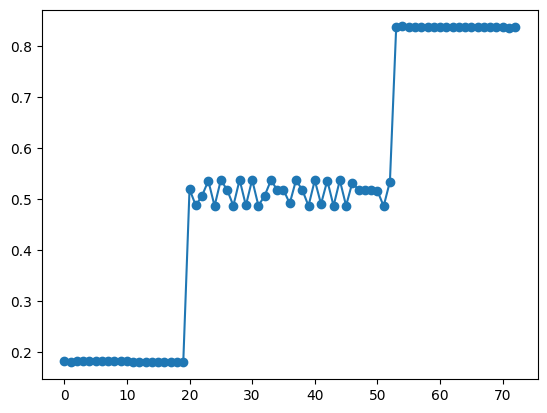

In [2368]:
plt.plot(x)
plt.scatter(range(len(x)),x)

In [2369]:
# coords

In [2370]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(3)
# kmeans.fit(np.array(x).reshape(-1,1))
# centers = kmeans.cluster_centers_.T
# centers = np.sort(centers, axis = 1).reshape(-1)
x = np.array(x)
centers = np.array([x.min(), x.mean(), x.max()]) 
print(centers)

[    0.18018     0.51121     0.83838]


In [2371]:
new_coors = coords.copy()
id(new_coors)

23413079991744

In [2561]:
class Table:
    def __init__(self):
        self.arr_xpos = None
        self.arr_ypos = None
    
    def from_coords(self, list_coords):
        print(len(list_coords))
        #центры класстеров по x coorditane каждого разпознаного объекта
        self.arr_xpos = np.array([x['x_c'] for x in list_coords])
        self.arr_ypos = np.array([x['y_c'] for x in list_coords])
        #центры класстеров по х для объектов
        self.centers = np.array([self.arr_xpos.min(), self.arr_xpos.mean(), self.arr_xpos.max()])
        lst_number, lst_X, lst_Y = [], [], []
        for item in list_coords:
            number_pos = np.argmin([abs(item['x_c'] - self.centers[0]), 
                                    abs(item['x_c'] - self.centers[1]),
                                    abs(item['x_c'] - self.centers[2])])
            if number_pos == 0:
                lst_number.append(item.copy())
            elif number_pos == 1:
                lst_X.append(item.copy())
            elif number_pos == 2:
                lst_Y.append(item.copy())
        print(f"Списки: {len(lst_number)} и {len(lst_X)} и {len(lst_Y)}")
        self.lst_number = lst_number
        self.lst_X = lst_X
        self.lst_Y = lst_Y
        # self.lst_number = self.connect_part_in_column(self.lst_number)
        
        self.X_before = lst_X.copy()
        self.Y_before = lst_Y.copy()
        
        if len(self.lst_X) != len(self.lst_Y):
            self.lst_X = self.connect_part_in_column(self.lst_X)
            self.lst_Y = self.connect_part_in_column(self.lst_Y)
        #проверка элементов to float
        if len(self.lst_X) != len(self.lst_Y):
            for k,item in enumerate(self.lst_X):
                try:
                    value = self.string_to_float(item['value'])
                    self.lst_X[k]['value'] = value
                except:
                    del self.lst_X[k]
            for k,item in enumerate(self.lst_Y):
                try:
                    value = self.string_to_float(item['value'])
                    self.lst_Y[k]['value'] = value
                except:
                    del lst_Y[k]
        else:
            for k, (x_item,y_item) in enumerate(zip(self.lst_X, self.lst_Y)):
                self.lst_X[k]['value'] = self.string_to_float(x_item['value'])
                self.lst_Y[k]['value'] = self.string_to_float(y_item['value'])
                
        print(f"Списки: {len(self.lst_X)} и {len(self.lst_Y)}")
        self._create_cells(self.lst_number, self.lst_X, self.lst_Y)
        self.arr_xpos = np.array([x['x_c'] for x in list(self.lst_number + self.lst_X + self.lst_Y)])
        self.arr_ypos = np.array([x['y_c'] for x in list(self.lst_number + self.lst_X + self.lst_Y)])
        return self.cells
    
    def _create_cells(self, lst_number, lst_X, lst_Y):
        number_line = len(lst_X)
        self.cells = [[None for j in range(3)] for i in range(number_line)]
        for i,(x_v, y_v) in enumerate(zip(lst_X, lst_Y)):
            self.cells[i][0] = self.get_nearest_number(x_v)
            self.cells[i][1] = x_v
            self.cells[i][2] = y_v
        return self.cells
    
    @property
    def X_xposition(self):
        return np.array([a['x_c'] for a in self.lst_X])
    
    @property    
    def Y_xposition(self):
        return np.array([a['x_c'] for a in self.lst_Y])
    
    @property
    def varience(self):
        yvar_X = np.array([x['x_c'] for x in self.lst_X]).var()
        yvar_Y = np.array([x['x_c'] for x in self.lst_Y]).var() 
        return yvar_X, yvar_Y
    
    def get_nearest_number(self, x_value):
        """
            Получить номер точки для текущей координаты X по позиции в изображении x_c и y_c 
        """
        yc = x_value['y_c']
        ypos_number = np.array([x['y_c'] for x in self.lst_number])
        ypos_X = np.array([x['y_c'] for x in self.lst_X])
        cell_height = (ypos_X[1:] - ypos_X[:-1]).mean()    #шаг между координатой по Y(высота ячейки в таблицe)
        
        delta = abs(ypos_number - yc)
        index = np.argmin(delta)
        if delta[index]<=cell_height*(0.9):
            return self.lst_number[index]
        else:
            return {'value': 'Err',
                    'x_c': np.array([x['x_c'] for x in self.lst_number]).mean(),
                    'y_c': yc}
        
    def connect_part_in_column(self, list_items):
        """
            Соединить части координат в столбце
        """
        def find_other_part(list_items, first_item):
            rmin = 1000
            second_item = None
            for item in list_items:
                if item == first_item:
                    continue
                r = abs(item['y_c'] - first_item['y_c'])
                if r<rmin:
                    rmin = r
                    second_item = item
            return second_item
        
        def connect_paths_val(first, second):
            val = first['value'].replace(" ","").replace(".","") + second['value'].replace(" ", "")
            return val
        
        arr_x = np.array([a['x_c'] for a in list_items])
        x_mean = arr_x.mean()
        x_var  = arr_x.var()
        result_list = []
        visited = []
        min_length = np.array([len(x['value']) for x in list_items]).mean()
        for item in list_items:
            if item in visited:
                continue
            r = abs(item['x_c'] - x_mean)**2
            cur_len = len(item['value'])
            if cur_len < min_length - 1:
                print(item['value'], cur_len)
                second_item = find_other_part(list_items, item)
                # print(item, second_item)
                visited.append(second_item)
                new_item = {'value':connect_paths_val(item, second_item),
                            'x_c'  :x_mean,
                            'y_c'  :(item['y_c'] + second_item['y_c'])*0.5}
                result_list.append(new_item)
            else:
                result_list.append(item)
        return result_list

    @property
    def frame(self):
        return pd.DataFrame({"N":[c[0]['value'] for c in self.cells], "X":[c[1]['value'] for c in self.cells], "Y":[c[2]['value'] for c in self.cells]})
    
    @staticmethod
    def string_to_float(string):
    

        if type(string) == float:
            return string
        result = string
        result = result.replace("\\","")
        result = result.replace("/","").replace("%","")
        if result.count(".") > 1:
            parts = result.split(".")
            result = "".join(parts[:-1]) + "." + parts[-1]
        if result.count(",") > 1:
            parts = result.split(",")
            result = "".join(parts[:-1]) + "." + parts[-1]
        if result.count(",") == 1 and result.count(".") == 1:
            result = result.replace(",",".")
            parts = result.split(".")
            result = "".join(parts[:-1]) + "." + parts[-1]

        ans = []
        for s in result:
            if s in ",.0123456789":
                ans.append(s)
        result = "".join(ans)    
        if len(result) == 1:
            if result not in "0123456789":
                return -1
        if len(result) == 0:
            return 0
        return float(result.replace(',','.'))

33


19

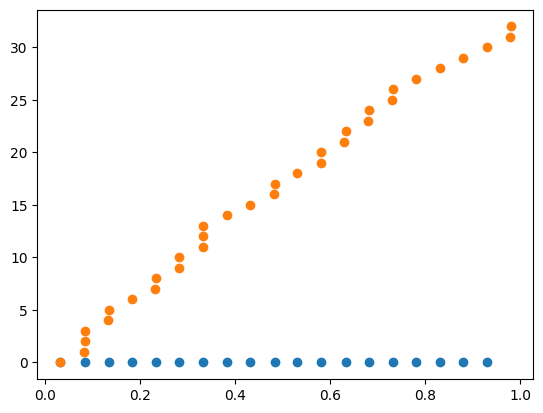

In [2562]:
y_lvl = np.array([x['y_c'] for x in table.X_before])
print(len(y_lvl))
diff = y_lvl[1:] - y_lvl[:-1]

index = np.where(diff > diff.mean())[0]

sort_lvl = y_lvl[index]
plt.scatter(sort_lvl, [0]*len(sort_lvl))
plt.scatter(y_lvl, range(len(y_lvl)))
len(sort_lvl)

In [2585]:
new_items = []
for t in table.cells:
    if t[0] == None or t[1] == None or t[2] == None:
        continue
    else:
        new_items.append(t)
new_items

[[{'value': '1', 'x_c': 0.18212890625, 'y_c': 0.032844489127670407},
  {'value': 2342.0, 'x_c': 0.5135091145833334, 'y_c': 0.056307322132502544},
  {'value': 31467592.46, 'x_c': 0.8367919921875, 'y_c': 0.05840847135681586}],
 [{'value': 'Hl', 'x_c': 0.18115234375, 'y_c': 0.08047053821210579},
  {'value': 10.81, 'x_c': 0.5135091145833334, 'y_c': 0.0836222620485758},
  {'value': 1467658.95, 'x_c': 0.83740234375, 'y_c': 0.13369965189471006}],
 [{'value': 'H2', 'x_c': 0.18310546875, 'y_c': 0.1301977365208545},
  {'value': 341984.43, 'x_c': 0.5135091145833334, 'y_c': 0.13264907728255343},
  {'value': 1467681.77, 'x_c': 0.83740234375, 'y_c': 0.1841272332782299}],
 [{'value': 'H3', 'x_c': 0.1826171875, 'y_c': 0.17922455175483215},
  {'value': 342003.23, 'x_c': 0.5185546875, 'y_c': 0.18342685020345878},
  {'value': 1467685.81, 'x_c': 0.8369140625, 'y_c': 0.23385443158697863}],
 [{'value': 'H4', 'x_c': 0.18310546875, 'y_c': 0.229652133138352},
  {'value': 342007.78, 'x_c': 0.5135091145833334, '

In [2568]:
{"N":[c[0]['value'] for c in table.cells], "X":[c[1]['value'] for c in table.cells], "Y":[c[2]['value'] for c in table.cells]}

TypeError: 'NoneType' object is not subscriptable

In [2544]:
mean_delta = diff[diff > diff.mean()].mean()
main_lvl = [y_lvl[0]]
for v in y_lvl[1:]:
    r = abs(v - np.array(main_lvl))
    if (r < mean_delta*0.5).any():
        continue
    else:
        main_lvl.append(v)
print(len(main_lvl))

items_on_lvl = {f"{i}":[] for i,item in enumerate(main_lvl)}
for v in table.X_before:
    k = np.argmin(abs(np.array(main_lvl) - v['y_c']))
    items_on_lvl[str(k)].append(v)

20


In [2560]:
new_listX = []
for k,items in items_on_lvl.items():
    if len(v)>1:
        val = "".join([str(v['value']) for v in items])
        print(val)
        new_listX.append(val)
    else:
        new_listX.append(v)
len(new_listX)

2
342-010,81
341984,43
342003.23
342007,78
342010,19
342-11.05
342015.63
342019.17
3420021,96
342022.68
342018,95
3420020,88
342034,60
342033,24
342027.07
342023.7
342021.03
342012.51
342010,81


20

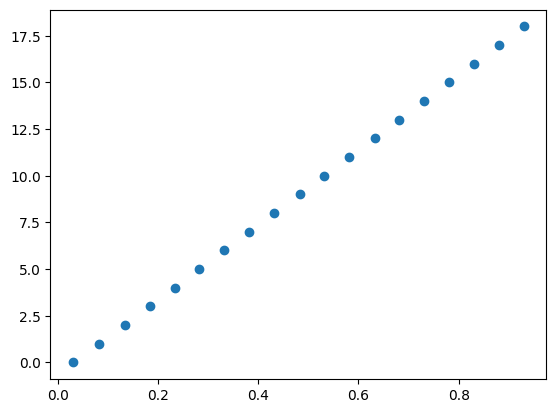

In [2433]:
index = np.where(diff > diff.mean())[0]
plt.scatter(y_lvl[index], range(len(y_lvl[index])))

In [2385]:
coords

[{'value': '1', 'x_c': 0.18212890625, 'y_c': 0.032844489127670407},
 {'value': 'Hl', 'x_c': 0.18115234375, 'y_c': 0.08047053821210579},
 {'value': 'H2', 'x_c': 0.18310546875, 'y_c': 0.1301977365208545},
 {'value': 'H3', 'x_c': 0.1826171875, 'y_c': 0.17922455175483215},
 {'value': 'H4', 'x_c': 0.18310546875, 'y_c': 0.229652133138352},
 {'value': 'H5', 'x_c': 0.1826171875, 'y_c': 0.28007971452187186},
 {'value': 'H6', 'x_c': 0.18310546875, 'y_c': 0.3291065297558494},
 {'value': 'H7', 'x_c': 0.18212890625, 'y_c': 0.3795341111393693},
 {'value': 'H8', 'x_c': 0.18212890625, 'y_c': 0.42856092637334686},
 {'value': 'H9', 'x_c': 0.18212890625, 'y_c': 0.47758774160732453},
 {'value': 'H10', 'x_c': 0.18212890625, 'y_c': 0.5287157060656155},
 {'value': 'H11', 'x_c': 0.1806640625, 'y_c': 0.577742521299593},
 {'value': 'H12', 'x_c': 0.181640625, 'y_c': 0.6281701026831129},
 {'value': 'H13', 'x_c': 0.18115234375, 'y_c': 0.6778973009918616},
 {'value': 'H14', 'x_c': 0.181640625, 'y_c': 0.727624499300

In [2393]:
coords = []
for b in blocks:
    for l in b['lines']:
        for w in l['words']:
            p1 = np.array(w['geometry'][0])
            p2 = np.array(w['geometry'][1])
            centr = (p2 + p1)/2
            coords.append({'value':w['value'],'x_c':centr[0],'y_c':centr[1]})
table = Table()
print(id(new_coors))
cells = table.from_coords(new_coors.copy())
print(id(new_coors))

23413079991744
73
Списки: 20 и 33 и 20
2 1
- 1
341 3
342 3
342 3
342 3
3420 4
342 3
3420 4
342 3
342 3
342 3
3 1
Списки: 21 и 19
23413079991744


In [2379]:
cells

[[{'value': '1', 'x_c': 0.18212890625, 'y_c': 0.032844489127670407},
  {'value': 2342.0, 'x_c': 0.5135091145833334, 'y_c': 0.056307322132502544},
  {'value': 31467592.46, 'x_c': 0.8367919921875, 'y_c': 0.05840847135681586}],
 [{'value': 'Hl', 'x_c': 0.18115234375, 'y_c': 0.08047053821210579},
  {'value': 10.81, 'x_c': 0.5135091145833334, 'y_c': 0.0836222620485758},
  {'value': 1467658.95, 'x_c': 0.83740234375, 'y_c': 0.13369965189471006}],
 [{'value': 'H2', 'x_c': 0.18310546875, 'y_c': 0.1301977365208545},
  {'value': 341984.43, 'x_c': 0.5135091145833334, 'y_c': 0.13264907728255343},
  {'value': 1467681.77, 'x_c': 0.83740234375, 'y_c': 0.1841272332782299}],
 [{'value': 'H3', 'x_c': 0.1826171875, 'y_c': 0.17922455175483215},
  {'value': 342003.23, 'x_c': 0.5185546875, 'y_c': 0.18342685020345878},
  {'value': 1467685.81, 'x_c': 0.8369140625, 'y_c': 0.23385443158697863}],
 [{'value': 'H4', 'x_c': 0.18310546875, 'y_c': 0.229652133138352},
  {'value': 342007.78, 'x_c': 0.5135091145833334, '

In [2375]:
# table.frame.to_csv('test.csv')

In [2376]:
img_crop.mean(), np.sqrt(img_crop.var())

(227.02591646645456, 66.27741881447575)

In [2377]:
img_crop.mean()
table.frame.head(25)

TypeError: 'NoneType' object is not subscriptable

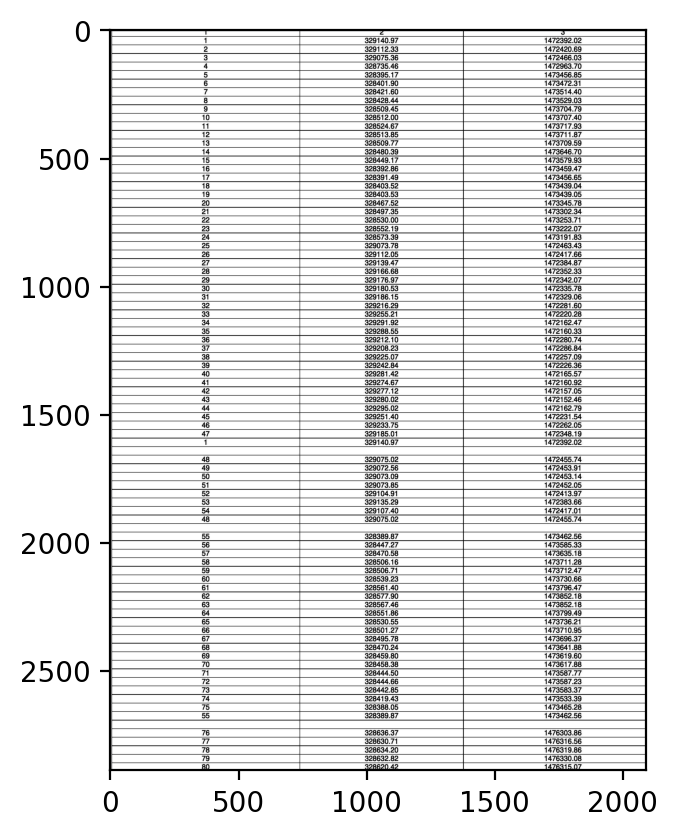

In [2354]:
fig = plt.figure(dpi = 200)
plt.imshow(img_crop)

<Figure size 640x480 with 0 Axes>

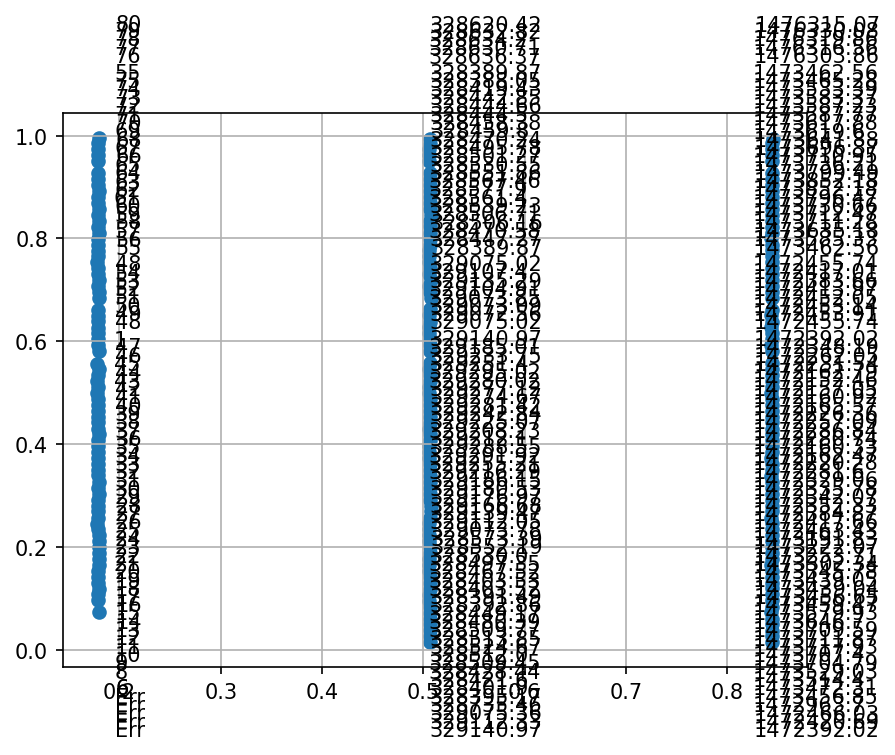

In [2359]:
fig = plt.figure(dpi = 100)
fig = plt.figure(dpi = 150)
for line in cells:
    for c in line:
        try:
            # print(c['value'],c['x_c'],c['y_c'])
            fig.text(c['x_c'],c['y_c'],c['value'])
        except:
            pass
x = [x for x in table.arr_xpos]
y = [x for x in table.arr_ypos]

plt.scatter(x,y)      
plt.grid()

In [1669]:
table.X_xposition.var()

4.095963782130319e-06

In [1670]:
x_mean = table.X_xposition.mean()
x_var = table.X_xposition.var()
for item in table.lst_X:
    r = abs(item['x_c'] - x_mean)**2
    if r>x_var/2:
        print(item['value'], abs(item['x_c'] - x_mean)**2)
        

335369.86 5.232832059831197e-06
335369.97 1.1158237910024047e-05
335370.03 5.232832059831197e-06
335370.06 8.373057265459514e-06
335370.0 8.373057265459514e-06
335369.9 3.1015091555618265e-06
335369.76 5.232832059831197e-06
335369.15 3.7013425477812603e-06
3353371.46 8.373057265459514e-06
335384.88 3.1015091555618265e-06


In [1672]:

N = [x['lines'][0]['words'][0]['value'].replace(',','.') for x in blocks[0::3]]
X = [x['lines'][0]['words'][0]['value'].replace(',','.') for x in blocks[1::3]]
Y = [x['lines'][0]['words'][0]['value'].replace(',','.') for x in blocks[2::3]]
print(N,X,Y)
df =pd.DataFrame({"N":N,"X":X,"Y":Y})
df

['32', '33', '1471177.19', '4'] ['335.369.86', '1471176.30', '40', '3353'] ['14711', '335370.03', '42', '6']


,N,X,Y
0,32,335.369.86,14711
1,33,1471176.30,335370.03
2,1471177.19,40,42
3,4,3353,6


In [220]:
coords = []
d = {}
for i, b in enumerate(pages[0]['blocks']):
    lines = b['lines']
    for i,l in enumerate(lines):
        print(l['words'], len(lines))
        if i == 0:
            d['N'] = l['words']
        elif i == 1:
            d['X'] = l['words']
        elif i == 2:
            d['Y'] = l['words']
    coords.append(d)
    if i+1%3==0:
        pass
coords

[{'value': '1', 'confidence': 0.999921441078186, 'geometry': ((0.1025390625, 0.092010498046875), (0.12890625, 0.16704305013020831))}] 1
[{'value': '346890,95', 'confidence': 0.9886489510536194, 'geometry': ((0.2626953125, 0.07325236002604169), (0.4931640625, 0.1498480902777778))}] 1
[{'value': '1473881,61', 'confidence': 0.9968395233154297, 'geometry': ((0.65234375, 0.04824150933159721), (0.8984375, 0.1264004177517361))}] 1
[{'value': '2', 'confidence': 0.9999368190765381, 'geometry': ((0.09765625, 0.19518025716145831), (0.134765625, 0.2733391655815972))}] 1
[{'value': '346900,66', 'confidence': 0.9982441663742065, 'geometry': ((0.26171875, 0.17173258463541669), (0.4951171875, 0.2545810275607639))}] 1
[{'value': '1473885,62', 'confidence': 0.9996351003646851, 'geometry': ((0.6513671875, 0.148284912109375), (0.9033203125, 0.2264438205295139))}] 1
[{'value': '3', 'confidence': 0.999998927116394, 'geometry': ((0.099609375, 0.2967868381076389), (0.1318359375, 0.373382568359375))}] 1
[{'val

[{'N': [{'value': '1473916,93',
    'confidence': 0.999790608882904,
    'geometry': ((0.6513671875, 0.8642205132378472),
     (0.90234375, 0.9423794216579862))}]},
 {'N': [{'value': '1473916,93',
    'confidence': 0.999790608882904,
    'geometry': ((0.6513671875, 0.8642205132378472),
     (0.90234375, 0.9423794216579862))}]},
 {'N': [{'value': '1473916,93',
    'confidence': 0.999790608882904,
    'geometry': ((0.6513671875, 0.8642205132378472),
     (0.90234375, 0.9423794216579862))}]},
 {'N': [{'value': '1473916,93',
    'confidence': 0.999790608882904,
    'geometry': ((0.6513671875, 0.8642205132378472),
     (0.90234375, 0.9423794216579862))}]},
 {'N': [{'value': '1473916,93',
    'confidence': 0.999790608882904,
    'geometry': ((0.6513671875, 0.8642205132378472),
     (0.90234375, 0.9423794216579862))}]},
 {'N': [{'value': '1473916,93',
    'confidence': 0.999790608882904,
    'geometry': ((0.6513671875, 0.8642205132378472),
     (0.90234375, 0.9423794216579862))}]},
 {'N': [{'

In [182]:
lines

[{'geometry': ((0.6845703125, 0.8512527533039648),
   (0.97265625, 0.9367428414096917)),
  'words': [{'value': '1459087.75',
    'confidence': 0.9997242093086243,
    'geometry': ((0.6845703125, 0.8512527533039648),
     (0.97265625, 0.9367428414096917))}]}]

In [113]:

print(len(pages))
blocks = pages[0]['blocks']
print(len(blocks))

df = pd.DataFrame()
for i,block in enumerate(blocks):
    # print(block['lines'])
    if i == 0:
        df = pd.DataFrame(l['words'][0]['value'] for l in block['lines'])
    else:
        _df = pd.DataFrame(l['words'][0]['value'] for l in block['lines'])
        df=pd.concat((df,_df), axis = 1)
df

1
13


,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2,104,333590.30,1476467.13,105,333594.64,1476467.16,106,333596.07,1476476.59,104,333590.30,1476467.13


In [2059]:
for f in Path('../dataset/all_table/').glob("*.jpg"):
    img_crop = cv2.imread(str(f))
    print(img_crop.mean(), np.sqrt(img_crop.var()), f)

239.06953625112843 47.91327626208543 ../dataset/all_table/Схема_общ_page_1.jpg
239.55352548443193 47.06862391530513 ../dataset/all_table/202310040001_page_1.jpg
246.3579963575917 40.64965011909693 ../dataset/all_table/схема границ публичного сервитута_page_0.jpg
238.87893751420907 49.44487562573732 ../dataset/all_table/202309220001_page_1.jpg
252.13517495881794 24.04072100872429 ../dataset/all_table/Схема расположениякоординаты_page_1.jpg
243.68751578247313 43.915904470241124 ../dataset/all_table/Схема перераспределения земельного участка на кадастровом плане территории_page_0.jpg
242.74599574570476 42.98829095810272 ../dataset/all_table/202310180001_page_0.jpg
249.5553533847149 24.6787809537297 ../dataset/all_table/202309250001_page_0.jpg
240.33550615287558 52.71095531552223 ../dataset/all_table/схема ПС_page_0.jpg
243.29341878137032 51.12856466792646 ../dataset/all_table/Схема на КПТ_page_1.jpg
233.84637955993313 46.62882104620666 ../dataset/all_table/202310090001_page_0.jpg
241.5002